# Numerical integration test
This tests 1-D integration methods including provided in the `Integration` module.

In [1]:
include("integration.jl")
using .Integration
names(Integration)

4-element Vector{Symbol}:
 :Integration
 :rectangle
 :simpson
 :trapezoidal

In [2]:
?rectangle

search: rectangle



```
rectangle(f::Function,a::T,b::T,n::Int) where {T}
```

Uses rectangle rule with $n$ function evaluations to estimate $\int_a^b f(x)\,dx$


In [7]:
nlist = 2 .^(1:9)

9-element Vector{Int64}:
   2
   4
   8
  16
  32
  64
 128
 256
 512

In [14]:
f(x) = 1/(1+x^2)
a = 0.0; b = 1.0; exact = pi/4
err_rect = [abs(exact-rectangle(f,a,b,nlist[i])) for i = 1:length(nlist)]
err_trap = [abs(exact-trapezoidal(f,a,b,nlist[i])) for i = 1:length(nlist)]
err_simp = [abs(exact-simpson(f,a,b,nlist[i])) for i = 1:length(nlist)]

9-element Vector{Float64}:
 6.006534703284494e-6
 3.778277157806542e-8
 5.912428324705843e-10
 9.23916498862809e-12
 1.4421797089880783e-13
 2.55351295663786e-15
 1.1102230246251565e-16
 3.3306690738754696e-16
 2.220446049250313e-16

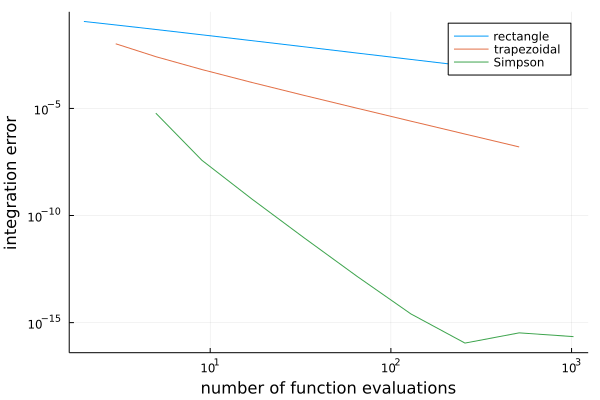

In [15]:
using Plots
plot(nlist,err_rect,xaxis=:log,yaxis=:log,label="rectangle",
    ylabel="integration error",xlabel="number of function evaluations")
plot!(nlist.+1,err_trap,xaxis=:log,yaxis=:log,label="trapezoidal")
plot!(2nlist.+1,err_simp,xaxis=:log,yaxis=:log,label="Simpson")

In [10]:
err_simp

9-element Vector{Float64}:
 3.7013462701906974e-5
 2.326240851502348e-6
 1.455928468896417e-7
 9.102726572507436e-9
 5.689697601951593e-10
 3.556155370176839e-11
 2.2222224060897133e-12
 1.383337888682945e-13
 9.547918011776346e-15